# Płytka sieć neuronowa w PyTorch

### Zaimportujmy zależności

In [155]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torchsummary import summary
import matplotlib.pyplot as plt

### Załadujmy dane i od razu przeskalujmy (funkcja ToTensor konwertuje piksele z [0,255] na [0,1])

In [156]:
train = MNIST('data', train=True, transform=transforms.ToTensor(), download=True)
test = MNIST('data', train=False, transform=transforms.ToTensor())

### Sprawdźmy jak wyglądają dane

In [157]:
train.data.shape

torch.Size([60000, 28, 28])

In [158]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [159]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

### Zobaczmy konkretne wartości

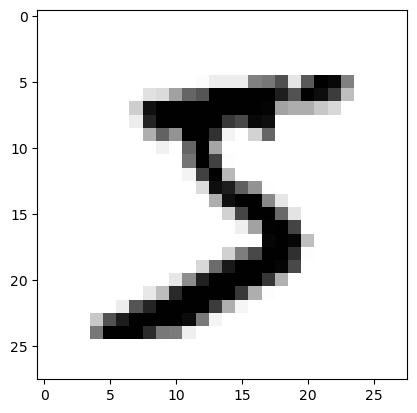

In [160]:
plt.imshow(train.data[0].numpy().squeeze(), cmap='gray_r')

In [161]:
train.targets[0:100]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [162]:
train.targets.shape

torch.Size([60000])

In [163]:
test.data.shape

torch.Size([10000, 28, 28])

In [164]:
test.targets.shape

torch.Size([10000])

### Popaczkujmy zbiór danych z wykorzystaniem klasy DataLoader i przejrzyjmy paczki

In [165]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True) 
test_loader = torch.utils.data.DataLoader(test, batch_size=128) 

In [166]:
n_batches = len(train_loader)
n_batches

469

In [167]:
n_test_batches = len(test_loader)
n_test_batches

79

In [168]:
X_sample, y_sample = next(iter(train_loader))

In [169]:
X_sample.shape

torch.Size([128, 1, 28, 28])

In [170]:
y_sample.shape

torch.Size([128])

In [171]:
y_sample

tensor([7, 5, 5, 0, 7, 6, 5, 6, 9, 6, 7, 0, 6, 2, 7, 2, 3, 1, 8, 0, 6, 3, 9, 8,
        7, 8, 9, 4, 4, 5, 0, 6, 0, 7, 8, 6, 1, 4, 0, 7, 8, 9, 6, 7, 1, 1, 5, 8,
        8, 5, 8, 4, 6, 9, 5, 0, 0, 1, 7, 5, 3, 1, 4, 0, 3, 2, 1, 7, 1, 2, 6, 7,
        0, 0, 2, 4, 4, 6, 3, 9, 5, 0, 9, 2, 7, 1, 5, 5, 3, 2, 9, 7, 7, 3, 3, 3,
        5, 6, 0, 5, 6, 5, 3, 4, 6, 6, 2, 0, 7, 1, 8, 6, 3, 5, 8, 7, 4, 8, 5, 7,
        7, 1, 1, 7, 4, 5, 2, 6])

In [172]:
X_sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

### Spłaszczamy paczkę 
(niespodzianie służy do tego funkcja .view())

In [173]:
X_flat_sample = X_sample.view(X_sample.shape[0], -1)

In [174]:
X_flat_sample.shape

torch.Size([128, 784])

In [175]:
X_flat_sample[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

### Czas na zaprojektowanie architektury sieci

PyTorch opiera się na modułach (obiektach klasy `torch.nn.Module`), które są łączone w graf obliczeń. Moduły mogą wykorzystywać parametry (obiekty klasy `torch.nn.Parameter`), dla których mogą być automatycznie liczone gradienty i które mogą podlegać optymalizacji.

**Zadanie 1. Zadeklaruj odpowiedni rozmiar wejścia i wyjścia tak, by warstwa wejściowa przyjęła pojedynczo wszystkie piksele obrazka, a warstwa wyjściowa mogła reprezentować każdą z klas**

In [184]:
n_input = X_flat_sample.shape[1]
n_dense = X_flat_sample.shape[0]
n_out = 10

In [185]:
n_input

784

Tworzymy model, składający się z sekwencji warstw: wejściowej warstwy liniowej czyli warstwy implementującej operację $\hat{y} = Wx + b$, (zwróćmy uwagę na jej liczbę wejść i wyjść), ukrytej warstwy gęstej o 64 neuronach z sigmoidalną funkcją aktywacji oraz wyjściowej warstwy liniowej (tu również zwróćmy uwagę na liczbę wejść)

In [177]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense),
    nn.Sigmoid(),
    nn.Linear(n_dense, n_out)
)

In [178]:
summary(model, (1, n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         100,480
           Sigmoid-2               [-1, 1, 128]               0
            Linear-3                [-1, 1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.39
Estimated Total Size (MB): 0.39
----------------------------------------------------------------


### Skonfigurujmy hiperparametry

**Zadanie 2. Zajrzyj do dokumentacji biblioteki torch i zadeklaruj entropię skrośną (CrossEntropy) jako funkcję straty oraz SGD jako algorytm optymalizacji - z parametrami modelu jako parametrami do optymalizacji, oraz ze stałą uczenia równą 0.01**

In [179]:
import torch.optim as optim

cost_fxn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Zdefinujmy metrykę trafności prognozy

**Zadanie 3. Zdefiniuj metrykę trafności prognozy, ustawiając następujące linijki w odpowiedniej kolejności w miejscach ...**
    
    1. correct = (prediction == true_y).sum().item()
    2. (correct / true_y.shape[0]) * 100.0
    3. _, prediction = torch.max(pred_y, 1)


In [180]:
def accuracy_pct(pred_y, true_y):
    _, prediction = torch.max(pred_y, 1)
    correct = (prediction == true_y).sum().item()
    return (correct / true_y.shape[0]) * 100.0

### Wreszcie nauczmy sieć 
(zwróćmy zwłaszcza uwagę na to co się dzieje w zagnieżdżonej pętli)

In [181]:
n_epochs = 20 

print('Training for {} epochs. \n'.format(n_epochs))

for epoch in range(n_epochs):
    avg_cost = 0.0
    avg_accuracy = 0.0
    
    for i, (X, y) in enumerate(train_loader): # enumerate() pozwala iterować po całym popaczkowanym zbiorze  
    
    # wykonujemy feed-forward:
        X_flat = X.view(X.shape[0], -1)
        y_hat = model(X_flat)
        cost = cost_fxn(y_hat, y)
        avg_cost += cost / n_batches
    
    # propagacja wsteczna i optymalizacja poprzez algorytm spadku gradientu: 
        optimizer.zero_grad() # ustawiamy gradienty w sieci na zero;
        cost.backward() #obliczamy i zbieramy gradienty
        optimizer.step() #aktualizujemy wagi z wykorzystaniem zebranych gradientów
    
    # obliczamy wartości wyznaczonej wcześniej metryki:
        accuracy = accuracy_pct(y_hat, y)
        avg_accuracy += accuracy / n_batches
    
        if (i + 1) % 100 == 0:
            print('Step {}'.format(i + 1))
            
        print('Epoch {}/{} complete: Cost: {:.3f}, Accuracy: {:.1f}% \n'.format(epoch + 1, n_epochs, avg_cost, avg_accuracy))

print('Training complete.')

Training for 20 epochs. 

Epoch 1/20 complete: Cost: 0.005, Accuracy: 0.0% 

Epoch 1/20 complete: Cost: 0.010, Accuracy: 0.0% 

Epoch 1/20 complete: Cost: 0.015, Accuracy: 0.1% 

Epoch 1/20 complete: Cost: 0.020, Accuracy: 0.1% 

Epoch 1/20 complete: Cost: 0.025, Accuracy: 0.1% 

Epoch 1/20 complete: Cost: 0.030, Accuracy: 0.1% 

Epoch 1/20 complete: Cost: 0.035, Accuracy: 0.1% 

Epoch 1/20 complete: Cost: 0.040, Accuracy: 0.1% 

Epoch 1/20 complete: Cost: 0.045, Accuracy: 0.2% 

Epoch 1/20 complete: Cost: 0.050, Accuracy: 0.2% 

Epoch 1/20 complete: Cost: 0.054, Accuracy: 0.2% 

Epoch 1/20 complete: Cost: 0.059, Accuracy: 0.2% 

Epoch 1/20 complete: Cost: 0.064, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.069, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.074, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.079, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.084, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.089, Accuracy: 0.3% 

Epoch 1/20 complete: Cost: 0.094, Accuracy: 0.4% 

Epoch

Epoch 1/20 complete: Cost: 0.119, Accuracy: 0.5% 

Epoch 1/20 complete: Cost: 0.123, Accuracy: 0.5% 

Epoch 1/20 complete: Cost: 0.128, Accuracy: 0.6% 

Epoch 1/20 complete: Cost: 0.133, Accuracy: 0.6% 

Epoch 1/20 complete: Cost: 0.138, Accuracy: 0.6% 

Epoch 1/20 complete: Cost: 0.143, Accuracy: 0.7% 

Epoch 1/20 complete: Cost: 0.148, Accuracy: 0.7% 

Epoch 1/20 complete: Cost: 0.153, Accuracy: 0.7% 

Epoch 1/20 complete: Cost: 0.158, Accuracy: 0.8% 

Epoch 1/20 complete: Cost: 0.163, Accuracy: 0.8% 

Epoch 1/20 complete: Cost: 0.168, Accuracy: 0.8% 

Epoch 1/20 complete: Cost: 0.172, Accuracy: 0.9% 

Epoch 1/20 complete: Cost: 0.177, Accuracy: 0.9% 

Epoch 1/20 complete: Cost: 0.182, Accuracy: 0.9% 

Epoch 1/20 complete: Cost: 0.187, Accuracy: 1.0% 

Epoch 1/20 complete: Cost: 0.192, Accuracy: 1.0% 

Epoch 1/20 complete: Cost: 0.197, Accuracy: 1.0% 

Epoch 1/20 complete: Cost: 0.202, Accuracy: 1.1% 

Epoch 1/20 complete: Cost: 0.207, Accuracy: 1.1% 

Epoch 1/20 complete: Cost: 0.21

### Testujemy model

**Zadanie 4. Zaimplementuj w gotowej pętli obliczanie trafności na całym zbiorze testowym z wykorzystaniem funkcji accuracy_pct**

In [182]:
model.eval()

costs = []
accuracies = []

with torch.no_grad(): # dezyaktywacja klasy autograd która oblicza pochodne i rejestruje graf wszystkich operacji wykonanych na tensorze, w tym przypadku chcemy zaoszczędzić pamięc
    avg_test_cost = 0.0
    avg_test_acc = 0.0
    
    for X, y in test_loader:
    
    # dokonujemy prognozy: 
        X_flat = X.view(X.shape[0], -1)
        y_hat = model(X_flat)
    
    # obliczamy koszt: 
        cost = cost_fxn(y_hat, y)
        avg_test_cost += cost / n_test_batches
        costs.append(cost)
    
    # tu odpowiedź - obliczamy trafność:
        test_accuracy = accuracy_pct(y_hat, y)
        avg_test_acc += test_accuracy / n_test_batches
        accuracies.append(test_accuracy)


print('Test cost: {:.3f}, Test accuracy: {:.1f}%'.format(avg_test_cost, avg_test_acc))

Test cost: 0.405, Test accuracy: 89.4%


### Wizualizacja

**Zadanie 5. Za pomocą dowolnej biblioteki wizualizacji przygotuj 2 wykresy/diagramy/histogramy ilustrujące zebrane wyniki wraz z opisem jakich informacji dostarczają przygotowane wykresy**

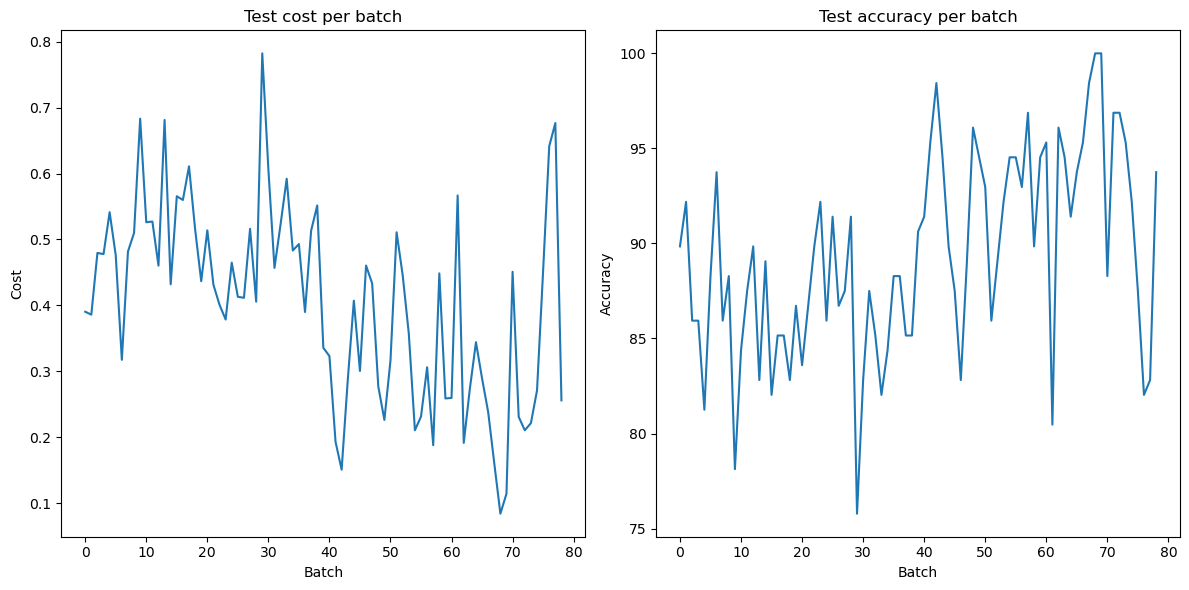

In [183]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Test cost per batch')
plt.xlabel('Batch')
plt.ylabel('Cost')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Test accuracy per batch')
plt.xlabel('Batch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()